In [805]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import mean_squared_error
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 20
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 16
rcParams['figure.titlesize'] = 1

In [606]:
rng = np.random.default_rng(seed=19)

## Generate some data

In [763]:
array1 = np.arange(0, 20.0, 0.005)
noise = 0.25* rng.normal(size=array1.size)
array2 = -0.005*np.power(array1 +noise,2) + 5 - 2.0/(array1+0.1)
noise2 = rng.normal(scale = 0.25, size=4000)
ydata = array2 - noise

In [764]:
idx = np.arange(len(array1))
indices = np.sort(rng.choice(idx, 25, replace = False))

In [793]:
xtest = np.array([4.33, 5.73, 6.33, 8.8, 12.88, 16.5, 17.2, 17.7, 18.4, 19.5])
noise_test = 0.25* rng.normal(size=10)
ytest = -0.005*np.power(xtest+noise_test,2) + 5 - 2.0/(xtest+0.1) - noise_test

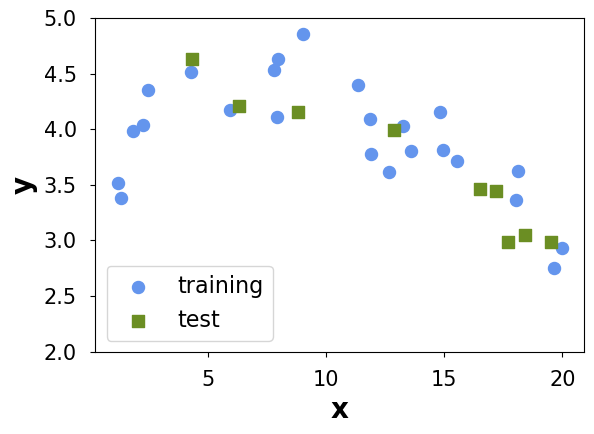

In [804]:
plt.scatter(x,ydata, color = 'cornflowerblue', s = 75, label = 'training')
plt.scatter(xtest,ytest, color = 'olivedrab', s = 75, marker = 's', label = 'test')
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(2,5)
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.savefig("data_test")
plt.show()

## Fit some models

In [767]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=15, include_bias=False)

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(x.reshape(-1, 1))

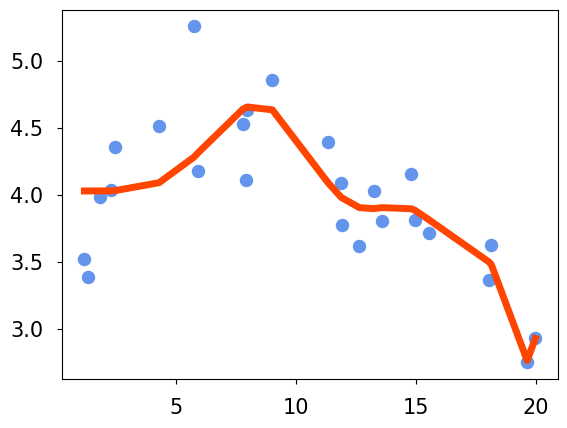

In [768]:
#fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, ydata)
y_pred = poly_reg_model.predict(poly_features)
plt.scatter(x,ydata, color = 'cornflowerblue', s = 75)
plt.plot(x,y_pred, color = 'orangered', linewidth = 5)
plt.show()
#print(poly_reg_model.intercept_, poly_reg_model.coef_)

In [841]:
xfit = np.linspace(0, 20.2, 1000)[:, None]
err_train = []
err_test = []
complexity = []

In [842]:
for n in np.arange(0,21):
    poly = PolynomialFeatures(degree=n+1, include_bias=False)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    poly_features_test = poly.fit_transform(xtest.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, ydata)
    
    y_pred = poly_reg_model.predict(poly_features)
    y_pred_test = poly_reg_model.predict(poly_features_test)
    training_error = mean_squared_error(ydata, y_pred)
    test_error = mean_squared_error(ytest, y_pred_test)
    err_train.append(training_error)
    err_test.append(test_error)
    complexity.append(n+1)
#     plt.scatter(x,ydata, color = 'cornflowerblue', s =75, label = 'Training MSE: '+str(round(training_error,3)))
#     #plt.plot(x,y_pred, color = 'orangered', linewidth = 5)
#     plt.scatter(xtest,ytest, color = 'olivedrab', s = 75, marker = 's', 
#                 label = 'Test MSE: '+str(round(test_error,3)))
    
#     plt.plot(xfit.ravel(),poly_reg_model.predict(poly.fit_transform(xfit)), color = 'orangered', linewidth = 5)
#     plt.ylim(2.0,5.0)
#     plt.title("Degree of Polynomial Curve = "+str(n+1))
#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.legend(loc = 'lower left', fontsize = 15)
#     plt.tight_layout()
#     plt.savefig("scores"+str(n+1)+ ".png")
#     plt.show()

## Training and Test Error

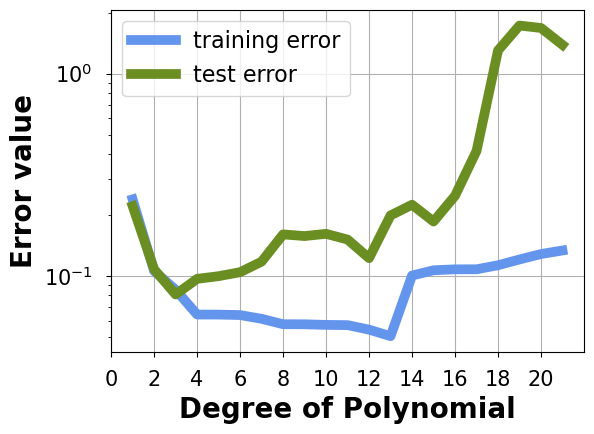

In [850]:
plt.plot(complexity, err_train,linewidth = 7, color = 'cornflowerblue', label = 'training error')
plt.plot(complexity, err_test,linewidth = 7, color = 'olivedrab', label = 'test error')
plt.yscale('log')
plt.legend()
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.grid()
plt.xlabel("Degree of Polynomial")
plt.ylabel("Error value")
plt.tight_layout()
plt.savefig("model_complexity")
plt.show()